# Sampling from random quantum circuits

In this notebook, we will sample from quantum random circuits and compare the distribution we obtain to the theoretical distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit.random import random_circuit

We define the parameters we are going to use for the random circuits. We also need two backends. The QASM simulator will be used to sample from the circuits and the statevector simualtor will be used to obtain the exact proability of each string that we sample. 

In [2]:
n_circs = 10000
n_qubits = 4
n_layers = 30
freq = []
backend_m = Aer.get_backend("qasm_simulator")
backend_s = Aer.get_backend("statevector_simulator")

Now, we generate random circuits and we sample one string from each. Then, we obtain the exact probability of that string.

In [3]:
for _ in range(n_circs):
    #Generate a random circuit 
    circ = random_circuit(n_qubits, n_layers, measure = False)
    #Sample one string from its output
    meas = QuantumCircuit(n_qubits,n_qubits)
    meas.measure(range(n_qubits),range(n_qubits))
    circ_m = circ + meas   
    job = execute(circ_m,backend = backend_m, shots = 1, memory = True)
    string = job.result().get_memory()[0]
    #Compute the exact probability of the string
    job = execute(circ, backend = backend_s)
    state = job.result().get_statevector()
    freq.append(abs(state[int(string,2)])**2)

Now, we plot the histogram of our samples and compare it to the theoretical distribution

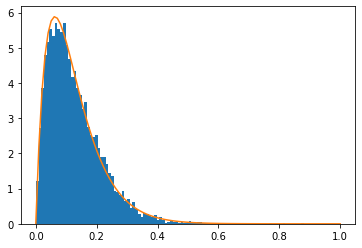

In [4]:
import numpy as np
xs = np.linspace(0.0, 1.0, 100)
dim = 2**n_qubits
ys = xs*(dim**2)*np.exp(-dim*xs)
plt.hist(freq, bins = 100, density = True)
plt.plot(xs, ys, label='Theoretical')
plt.show()